### Machine Learning Project in Python Step-By-Step

This Notebook shows how all of the pieces of a `predictive modeling machine learning project` actually fit together. If you are a `machine learning beginner` and looking to finally get started using Python, this Notebook is for you.

#### The Hello World of Machine Learning

The best small project to start with on a new tool is the classification of **iris flowers**. This is a good dataset for your first project because it is so well understood. 

* Attributes are `numeric` so you do not have to figure out how to load and handle data.
* It is a `classification problem`, allowing you to practice with an easier type of `supervised learning algorithm`.
* It is a `multiclass classification problem` (multi-nominal) that may require some specialized handling.
* It only has `4 attributes` and `150 rows`, meaning it is small and easily fits into memory (and a screen or single sheet of paper).
* All of the `numeric attributes` are in the same units and the same scale not requiring any `special scaling` or transforms to get started.


Here is an overview of what we are going to cover:
    
* Loading the dataset.
* Summarizing the dataset.
* Visualizing the dataset.
* Evaluating some algorithms.
* Making some predictions.

### Load The Data

In this step we are going to load the `libraries` and the `iris data CSV` file from URL.

In [2]:
# Import libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Load Dataset

The `iris dataset` can be downloaded from the `UCI Machine Learning repository`. We are using `Pandas` to load the data. We will also use `Pandas next to explore the data` both with `descriptive statistics` and `data visualization`. Note that we are specifying the names of each column when loading the data. This will help later when we explore the data.

In [3]:
# Load dataset
filename = 'iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(filename, names=names)

In [25]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
dataset['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Dimensions of the dataset.

We can get a quick idea of how many `instances` (rows) and how many `attributes` (columns) the data contains with the shape property.

In [15]:
# Descriptive statistics
# shape
print(dataset.shape)

(150, 5)


#### Peek at the data itself.

It is also always a good idea to actually eyeball your data.

In [16]:
# head
# first 20 rows of the data:
dataset.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### Statistical summary of all attributes.

Now we can take a look at a summary of each attribute. This includes the `count`, `mean`, the `min` and `max` values as well as some `percentiles`.

In [19]:
# descriptions
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see that all of the numerical values have the same scale (centimeters) and similar 
ranges between 0 and 8 centimeters.

In [9]:
# descriptions
dataset.describe(include="all")

,sepal-length,sepal-width,petal-length,petal-width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


#### Breakdown of the data by the class variable.

Let's take a look at the number of `instances` (rows) that belong to each class. We can view this as an `absolute count`.

In [21]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


We can see that each class has the same number of instances (50 or 33% of the dataset).

#### Data visualizations

We now have a basic idea about the data. We need to extend this with some visualizations. We are going to look at two types of plots:

* Univariate plots to better understand each attribute.
* Multivariate plots to better understand the relationships between attributes.

#### Univariate Plots

We will start with some `univariate plots`, that is, plots of each individual variable. Given that the input variables are `numeric`, we can create `box and whisker plots` of each.

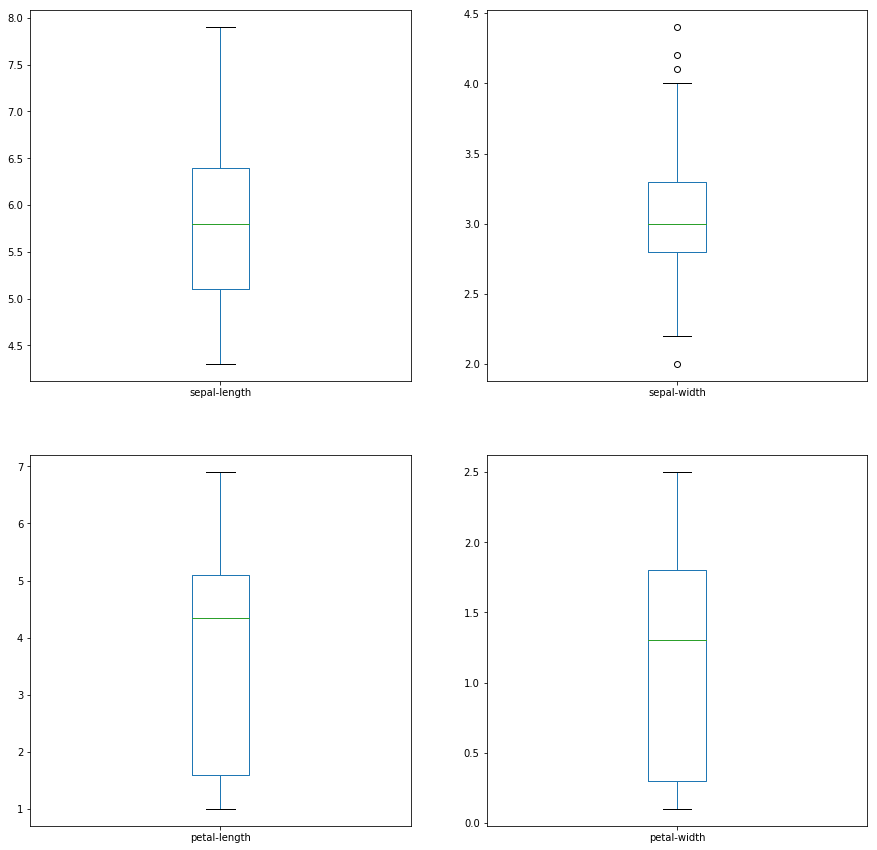

In [50]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(15, 15))
pyplot.show()

We can also create a histogram of each input variable to get an idea of the distribution.

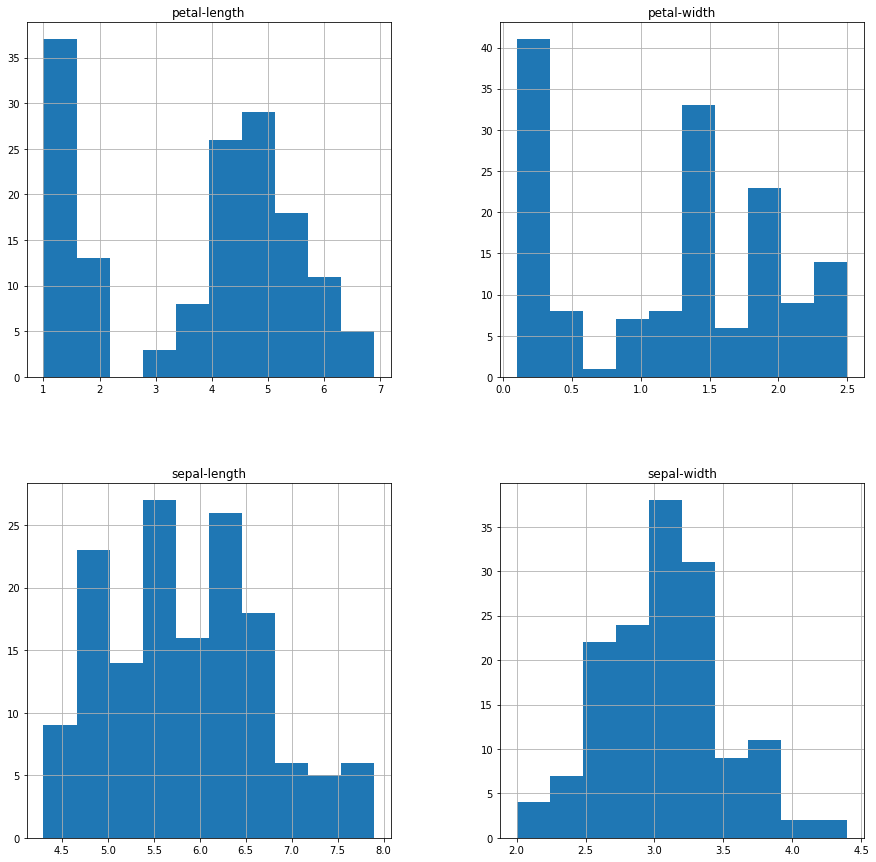

In [51]:
# histograms
dataset.hist(figsize=(15,15))
pyplot.show()

It looks like perhaps two of the `input variables` have a `Gaussian distribution`. This is useful to note as we can use `algorithms` that can `exploit this assumption`.

`Normal distribution`, also known as the `Gaussian distribution`, is a `probability distribution` that is `symmetric` about the `mean`, showing that `data` near the `mean` are `more frequent` in `occurrence` than `data` far from the `mean.`

The normal distribution is the most important probability distribution in statistics because it fits many natural phenomena. For example, heights, blood pressure, measurement error, and IQ scores follow the normal distribution. It is also known as the Gaussian distribution and the bell curve.

The normal distribution is a probability function that describes how the values of a variable are distributed. It is a symmetric distribution where most of the observations cluster around the central peak and the probabilities for values further away from the mean taper off equally in both directions. Extreme values in both tails of the distribution are similarly unlikely.

#### Multivariate Plots

Now we can look at the interactions between the variables. Let's look at scatter plots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

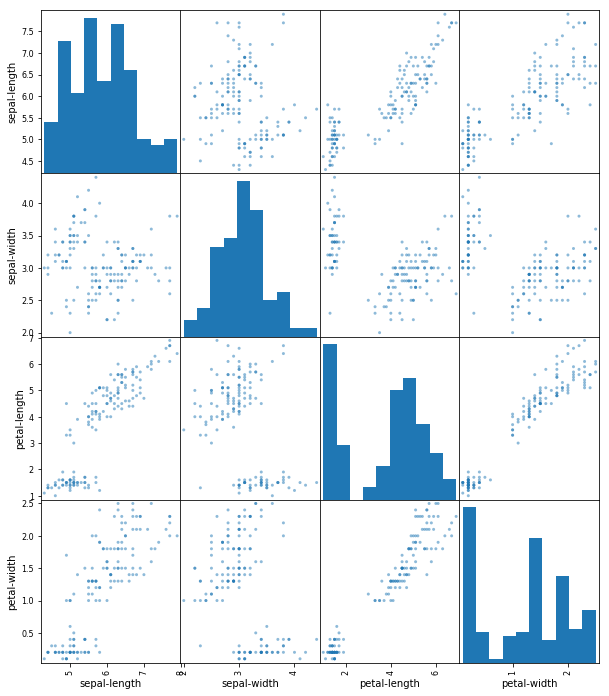

In [62]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(10,12))
pyplot.show()

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

#### Evaluate Some Algorithms

Now it is time to create some models of the data and estimate their accuracy on unseen data.
Here is what we are going to cover in this step:

* Separate out a `validation dataset`.
* Setup the `test harness` to use `10-fold cross-validation`.
* Build `5 different models` to predict species from `flower` measurements
* Select the `best model`.

#### Create a Validation Dataset

We need to know whether or not the `model` that we created is any good. Later, we will use `statistical methods` to estimate the `accuracy` of the `models` that we create on `unseen data`. We also want a more concrete estimate of the accuracy of the `best model` on unseen data by evaluating it on `actual unseen data`. That is, we are going to `hold back some data` that the
`algorithms will not get to see` and we will `use this data to get a second and independent idea of how accurate the best model` might actually be. We will split the loaded dataset into two, `80%` of which we will use to `train` our models and `20%` that we will hold back as a `validation dataset`.

#### Prepare Data

In [55]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

We now have `training data` in the `X-train` and `Y-train` for preparing models and a `X_validation` and `Y_validation` sets that we can use later.

### Test Harness

We will use `10-fold cross-validation` to estimate `accuracy`. This will split our dataset into `10 parts`, `train on 9` and `test on 1` and repeat for all combinations of `train-test splits`. We are using the `metric of accuracy` to evaluate models. This is a `ratio` of the number of `correctly predicted instances` divided by the `total number of instances` in the dataset multiplied by `100` to give a percentage (e.g. `95% accurate`). We will be using the `scoring variable` when we run `build` and
`evaluate` each model next.

### Build Models

We don't know which `algorithms` would be good on this problem or what `configurations` to use. We get an idea from the plots that some of the `classes` are partially `linearly` separable in some dimensions, so we are expecting generally good results. Let's evaluate `six` different `algorithms`:

* **Logistic Regression (LR)**.
* **Linear Discriminant Analysis (LDA)**.
* **k-Nearest Neighbors (KNN)**.
* **Classification and Regression Trees (CART)**.
* **Gaussian Naive Bayes (NB)**.
* **Support Vector Machines (SVM)**.

This list is a good mixture of `simple linear (LR and LDA)`, `nonlinear (KNN, CART, NB and SVM)` algorithms. We reset the `random number seed` before each run to ensure that the `evaluation` of each `algorithm` is performed using exactly the same `data splits`. It ensures the results are directly comparable. 

### Spot-Check Algorithms

In [56]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [57]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


### Select the best Model

We now have 6 models and accuracy estimations for each. We need to compare the models to
each other and select the most accurate. 

We can see that it looks like `SVM` has the `largest estimated accuracy score`. We can also create a `plot of the model evaluation results` and compare the `spread and the mean accuracy` of each model. There is a population of accuracy measures for each algorithm because each `algorithm was evaluated 10 times` (10 fold cross-validation).

#### Compare Algorithms

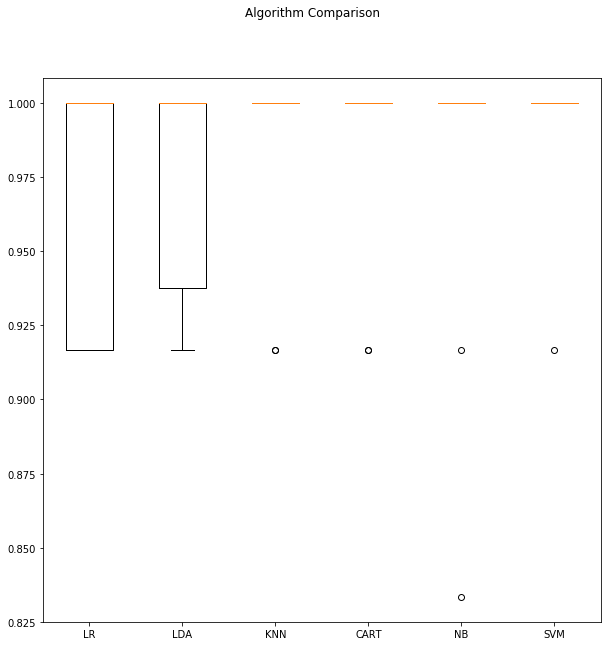

In [58]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

We can see that the `box and whisker plots are squashed at the top of the range, with many
samples achieving 100% accuracy`.

### Make Predictions

The `SVM algorithm` was the most accurate model that we tested. Now we want to get an idea of the `accuracy of the model` on our `validation dataset`. This will give us an `independent final` check on the `accuracy of the best model`. It is important to keep a `validation set` just in case you made a slip during training, such as `overfitting` to the training set or a `data leak`. Both will result in an `overly optimistic result`. We can run the `SVM model` directly on the `validation set` and summarize the results as a `final accuracy score`, a `confusion matrix` and a `classification report`.

In [59]:
clf = SVC(gamma='auto')
clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
predictions = clf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

      micro avg       0.93      0.93      0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



We can see that the accuracy is `0.93` or `93%`. The `confusion matrix` provides an indication of the three errors made. Finally the `classification report` provides a breakdown of each class by `precision`, `recall`, `f1-score` and support showing excellent results (granted the validation dataset was small).

The KNN algorithm was the second most accurate model that we tested. Now we want to get an idea
of the accuracy of the model on our validation dataset. This will give us an independent final
check on the accuracy of the best model. It is important to keep a validation set just in case
you made a slip during training, such as overfitting to the training set or a data leak. Both
will result in an overly optimistic result. We can run the KNN model directly on the validation
set and summarize the results as a final accuracy score, a confusion matrix and a classification
report.

In [61]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of
the three errors made. Finally the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset
was small).

We discovered `step-by-step` how to complete our `first machine learning project` in Python. We discovered that completing a small `end-to-end project` from `loading the data` to `making predictions` is the best way to get familiar with the platform.